<a href="https://colab.research.google.com/github/suman111999/Breast-Cancer-Classification/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn.ensemble
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score  
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import itertools
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error 

In [ ]:
df=pd.read_excel('BreastCancer_Prognostic_v1.xlsx')
df.head()

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [ ]:
df1=df[df.Outcome != 'N']

In [ ]:
df1.shape

(47, 35)

In [ ]:
df1.head()

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
4,843584,R,27,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.19800,...,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
5,843786,R,77,12.75,15.29,84.60,502.7,0.1189,0.1569,0.16640,...,107.3,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0
7,844582,R,77,13.71,20.83,90.20,577.9,0.1189,0.1645,0.09366,...,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10
13,847990,R,36,14.54,27.54,96.73,658.8,0.1139,0.1595,0.16390,...,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,6.0,6
15,848620,R,10,16.13,20.68,108.10,798.8,0.1170,0.2022,0.17220,...,136.8,1315.0,0.1789,0.4233,0.4784,0.2073,0.3706,0.11420,3.0,1


<h1>Data Cleaning</h1>

In [ ]:
df1.replace(to_replace='?',value=np.nan,inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 4 to 196
Data columns (total 35 columns):
ID                           47 non-null int64
Outcome                      47 non-null object
Time                         47 non-null int64
radius_mean                  47 non-null float64
texture_mean                 47 non-null float64
perimeter_mean               47 non-null float64
area_mean                    47 non-null float64
smoothness_mean              47 non-null float64
compactness_mean             47 non-null float64
concavity_mean               47 non-null float64
concave_points_mean          47 non-null float64
symmetry_mean                47 non-null float64
fractal_dimension_mean       47 non-null float64
radius_std_dev               47 non-null float64
texture_std_dev              47 non-null float64
perimeter_std_dev            47 non-null float64
area_std_dev                 47 non-null float64
smoothness_std_dev           47 non-null float64
compactness_std_dev

In [ ]:
df1.isna().values.any()

True

In [ ]:
df1=df1.fillna(df1.mean())

In [ ]:
df1.isna().values.any()

False

In [ ]:
l=['ID','Outcome']
df1.drop(l,axis=1,inplace=True)

In [ ]:
df1.head()

,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
4,27,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.19800,0.10430,0.1809,...,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0
5,77,12.75,15.29,84.60,502.7,0.1189,0.1569,0.16640,0.07666,0.1995,...,107.3,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0.0
7,77,13.71,20.83,90.20,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,...,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10.0
13,36,14.54,27.54,96.73,658.8,0.1139,0.1595,0.16390,0.07364,0.2303,...,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,6.0,6.0
15,10,16.13,20.68,108.10,798.8,0.1170,0.2022,0.17220,0.10280,0.2164,...,136.8,1315.0,0.1789,0.4233,0.4784,0.2073,0.3706,0.11420,3.0,1.0


In [ ]:
df1.describe()

,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,...,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,25.085106,18.396596,21.781915,121.603830,1089.597872,0.103147,0.142719,0.163169,0.093936,0.187860,...,152.331915,1651.495745,0.145436,0.359219,0.442155,0.184783,0.313362,0.088740,3.461702,4.869565
std,22.718341,3.359142,3.658725,22.926511,396.378098,0.010205,0.040964,0.062463,0.034450,0.020855,...,32.786742,703.771798,0.019402,0.129717,0.146765,0.037959,0.060953,0.016601,2.008845,5.951283
min,1.000000,12.340000,14.340000,81.150000,477.400000,0.082170,0.067220,0.052530,0.033340,0.142400,...,101.700000,733.200000,0.102100,0.120200,0.224900,0.118500,0.229300,0.060910,0.400000,0.000000
25%,9.000000,15.815000,19.225000,104.900000,800.950000,0.094145,0.113450,0.111550,0.068070,0.172250,...,128.600000,1167.500000,0.130150,0.263900,0.326700,0.152900,0.270800,0.077080,2.400000,0.500000
50%,16.000000,19.000000,21.490000,123.700000,1104.000000,0.103400,0.133900,0.165500,0.089940,0.186700,...,146.000000,1483.000000,0.147200,0.354200,0.406900,0.184100,0.303200,0.088150,3.000000,2.000000
75%,36.500000,20.290000,24.055000,133.700000,1289.500000,0.111750,0.166550,0.212000,0.109550,0.198300,...,171.350000,1989.500000,0.160150,0.411150,0.537550,0.209000,0.339900,0.099895,4.000000,7.000000
max,78.000000,27.220000,30.990000,182.100000,2250.000000,0.121500,0.236300,0.336800,0.191300,0.235600,...,232.200000,3903.000000,0.185100,0.744400,0.734500,0.275600,0.488200,0.134100,10.000000,27.000000


In [ ]:
X=df1.drop('Time',axis=1)
X.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
4,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.19800,0.10430,0.1809,0.05883,...,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0
5,12.75,15.29,84.60,502.7,0.1189,0.1569,0.16640,0.07666,0.1995,0.07164,...,107.3,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0.0
7,13.71,20.83,90.20,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,...,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10.0
13,14.54,27.54,96.73,658.8,0.1139,0.1595,0.16390,0.07364,0.2303,0.07077,...,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,6.0,6.0
15,16.13,20.68,108.10,798.8,0.1170,0.2022,0.17220,0.10280,0.2164,0.07356,...,136.8,1315.0,0.1789,0.4233,0.4784,0.2073,0.3706,0.11420,3.0,1.0


In [ ]:
y=df1['Time']
y.head()

4     27
5     77
7     77
13    36
15    10
Name: Time, dtype: int64

<h1>feature selection and model</h1>

In [ ]:
corr_matrix = df1.corr()
corr_matrix['Time'].sort_values(ascending=False)

Time                         1.000000
fractal_dimension_mean       0.309490
Worst_fractal_dimension      0.280187
smoothness_mean              0.220960
symmetry_mean                0.220752
fractal_dimension_std_dev    0.195311
Worst_smoothness             0.166865
texture_std_dev              0.162517
smoothness_std_dev           0.130888
Worst_symmetry              -0.005993
compactness_std_dev         -0.007132
Worst_texture               -0.017073
Worst_compactness           -0.036021
symmetry_std_dev            -0.070188
concave_points_std_dev      -0.075561
Lymph_Node_Status           -0.083547
texture_mean                -0.093672
concavity_std_dev           -0.094158
Tumor_Size                  -0.096434
compactness_mean            -0.141645
Worst_concavity             -0.150612
perimeter_std_dev           -0.186191
radius_std_dev              -0.204594
area_std_dev                -0.257040
concavity_mean              -0.284048
concave_points_mean         -0.352050
Worst_concav

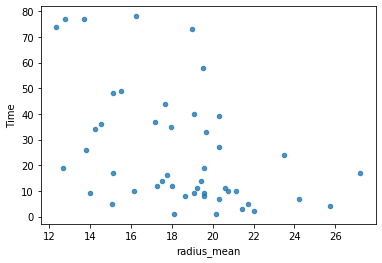

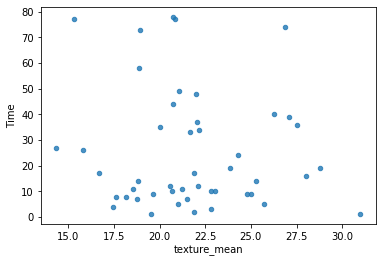

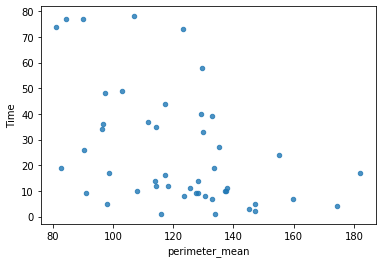

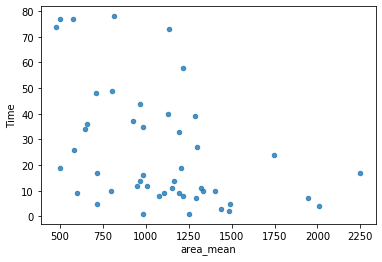

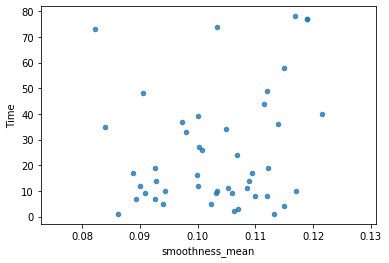

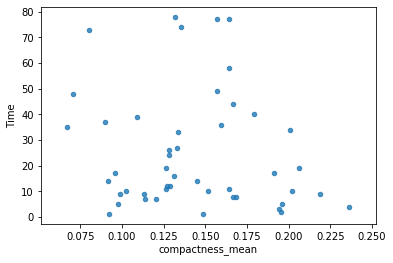

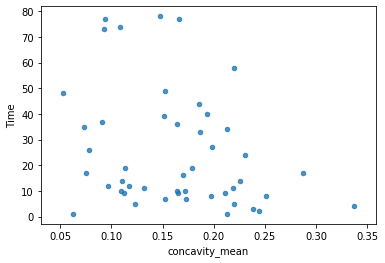

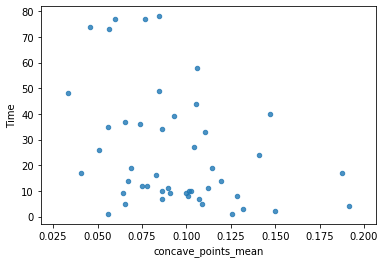

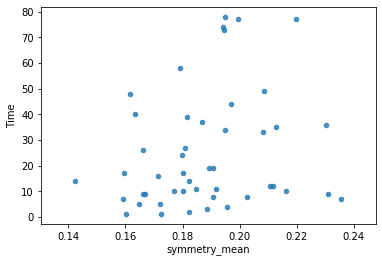

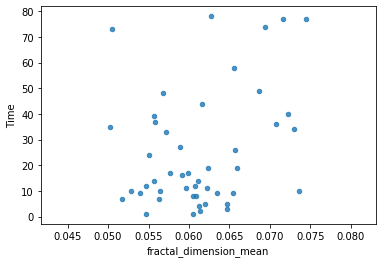

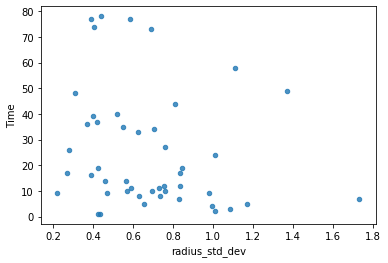

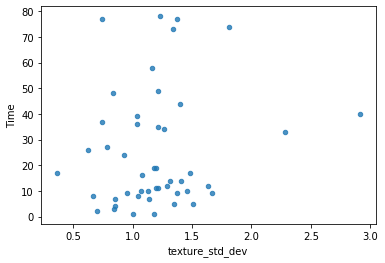

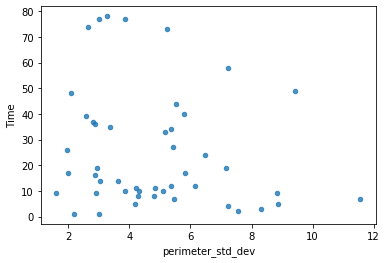

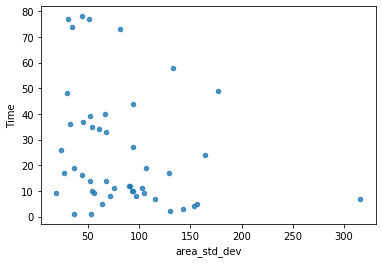

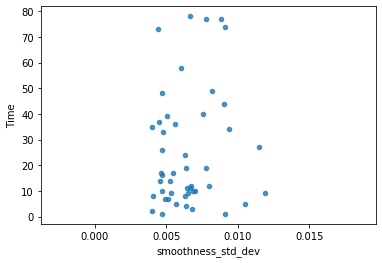

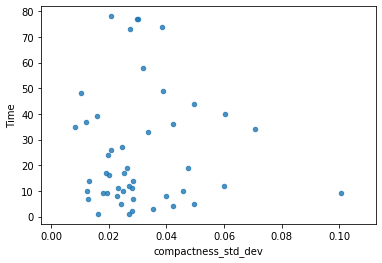

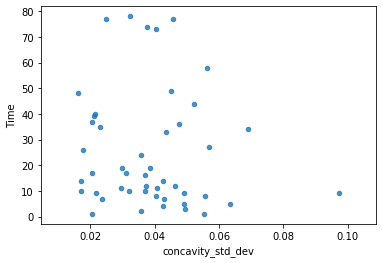

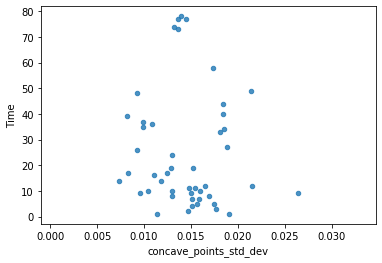

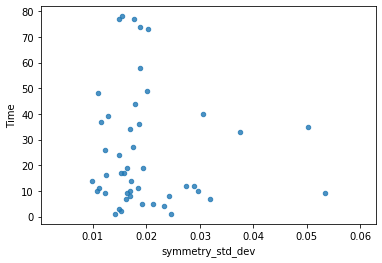

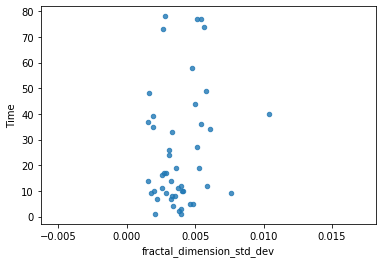

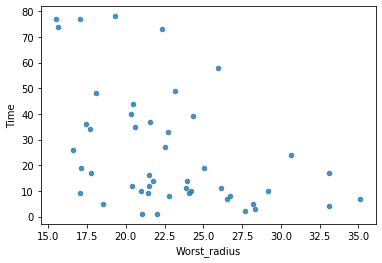

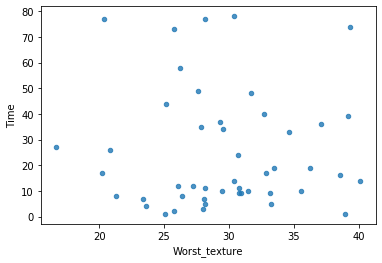

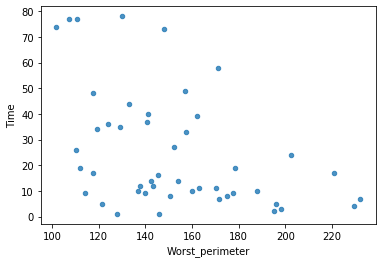

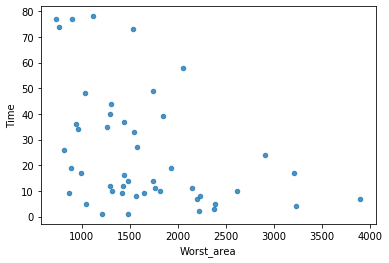

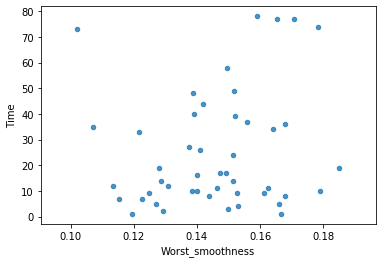

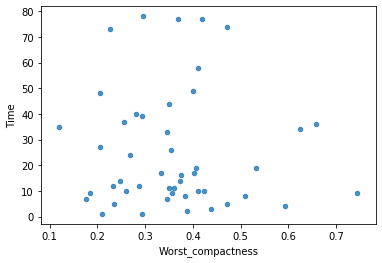

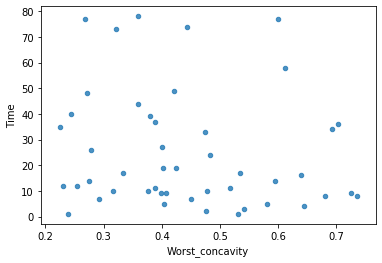

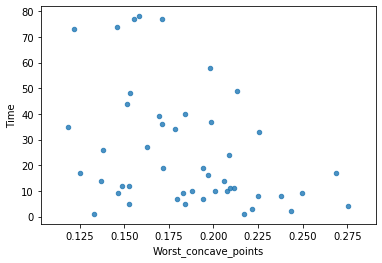

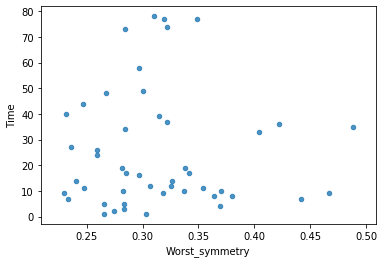

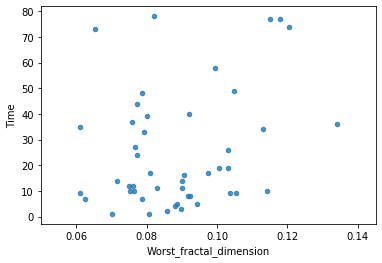

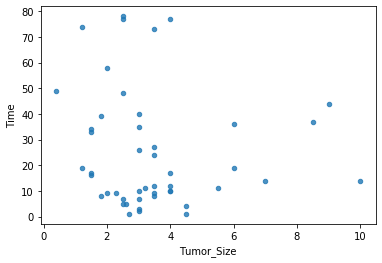

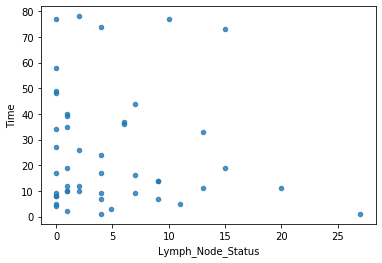

In [ ]:
for x in X.columns:
    df1.plot(kind="scatter", x=x, y="Time", alpha=0.8)

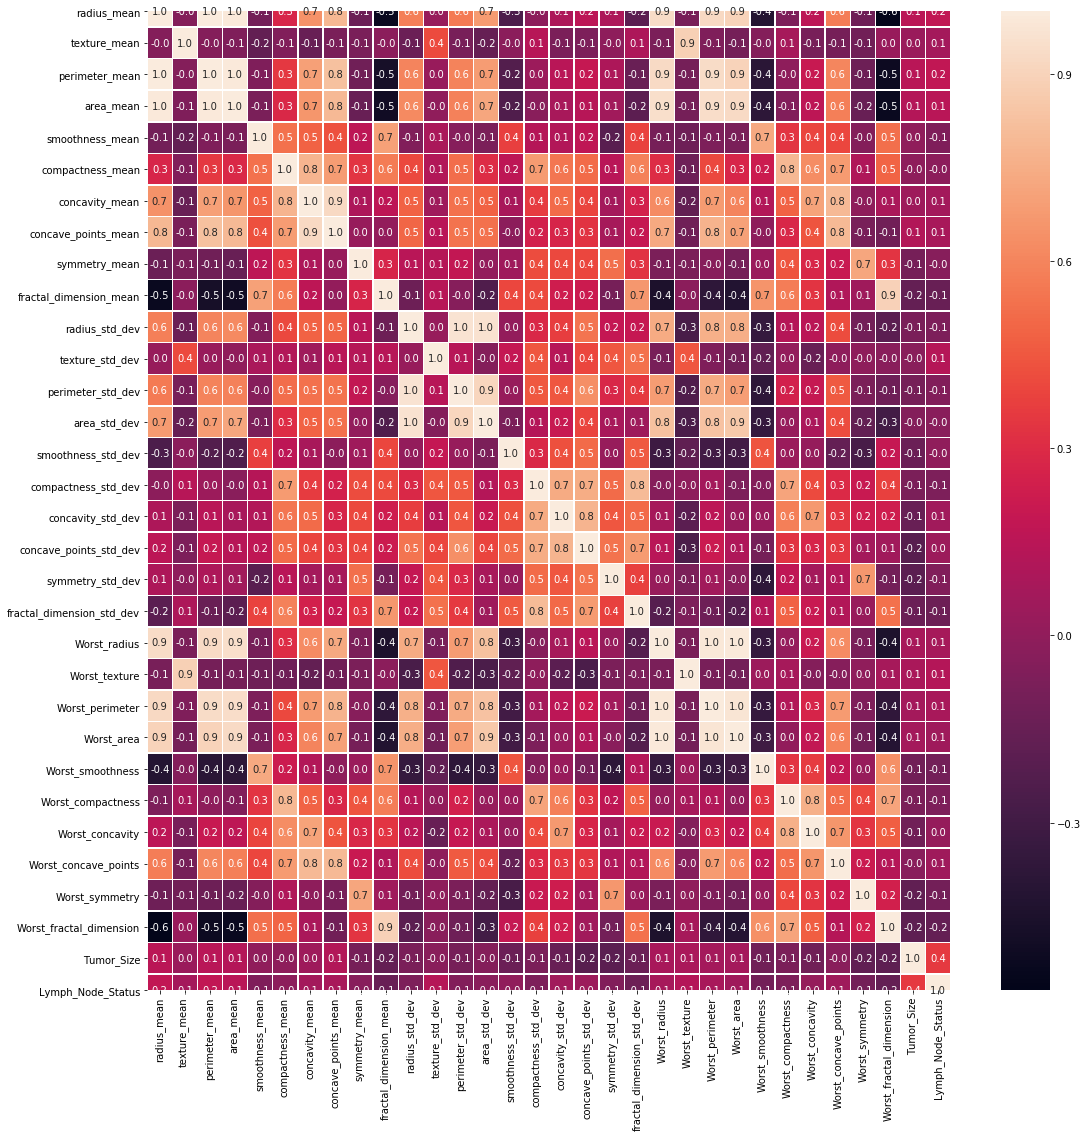

In [ ]:
fi,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5,fmt= '.1f',ax=ax)

<p>without feature selction</p>

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.3,random_state=0)

In [ ]:
r= RandomForestRegressor()
r.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

<p>feature selction</p>

In [ ]:
f=list(X_train.columns)
featimp = pd.Series(r.feature_importances_, index=f).sort_values(ascending=False)
featimp

fractal_dimension_mean       0.215358
compactness_mean             0.110800
concave_points_mean          0.083658
perimeter_mean               0.065397
radius_mean                  0.056081
concave_points_std_dev       0.031891
Worst_texture                0.031441
smoothness_mean              0.031437
Worst_smoothness             0.031091
area_mean                    0.029905
radius_std_dev               0.028324
Tumor_Size                   0.027307
compactness_std_dev          0.027106
Worst_concave_points         0.023385
texture_mean                 0.022542
Worst_radius                 0.021089
fractal_dimension_std_dev    0.017024
concavity_mean               0.016757
texture_std_dev              0.016287
Worst_perimeter              0.014028
concavity_std_dev            0.013969
symmetry_std_dev             0.013479
perimeter_std_dev            0.010801
Worst_fractal_dimension      0.010054
Worst_area                   0.008696
Lymph_Node_Status            0.008540
symmetry_mea

In [ ]:
l1=['area_std_dev','Worst_fractal_dimension','smoothness_std_dev','perimeter_std_dev','Worst_concavity','Worst_compactness']
X_0= X.drop(l1,axis = 1 )
X_0.shape

(47, 26)

In [ ]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(X_0, y, test_size=.3,random_state=0)

In [ ]:
r0 = RandomForestRegressor()
r0.fit(X_train0,y_train0)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = r.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred) 
print(mse)
print()
print(mae)
print()
rmse = np.sqrt(mse)
print(rmse)
print()
print(r2_score(y_test,y_pred))

643.3208466666666

20.244666666666667

25.363770355896747

-0.06963428881794775


In [ ]:
from sklearn.metrics import mean_squared_error
y_predr0 = r0.predict(X_test0)
mse0 = mean_squared_error(y_test0,y_predr0)
mae0=mean_absolute_error(y_test0,y_predr0)
rmse0 = np.sqrt(mse0)

print(mse0)
print()
print(mae0)
print()
rmse0 = np.sqrt(mse0)
print(rmse0)
print()
print(r2_score(y_test0,y_predr0))

588.3529333333332

19.065333333333335

24.25598757695372

0.021759554846147333


In [ ]:
df = pd.DataFrame({'Actual': y_test0, 'Predicted': y_predr0})
df

,Actual,Predicted
120,58,10.65
132,5,24.70
128,24,8.24
15,10,31.71
67,44,20.69
43,19,31.28
159,11,13.32
129,33,16.02
88,17,31.59
42,34,37.55


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test0, y_predr0))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test0, y_predr0))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test0, y_predr0)))

Mean Absolute Error: 19.065333333333335
Mean Squared Error: 588.3529333333332
Root Mean Squared Error: 24.25598757695372


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(r,X_train ,y_train , scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print(rmse_scores)

[24.29595028 30.37758014 13.69084974  8.92147409 16.17047824 32.54478248
 17.87389997 27.18398058  7.68024522 15.11235477]


In [ ]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [ ]:
print_scores(scores)

Scores: [ -590.2932      -922.797375    -187.43936667   -79.5927
  -261.48436667 -1059.16286667  -319.4763      -738.9688
   -58.98616667  -228.38326667]
Mean:  -444.6584408333333
Standard deviation:  340.32875450402753


In [ ]:
regr = LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
print(y_pred)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print( mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print(r2_score(y_test,y_pred))
print()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

[ -41.76002621  -49.62477751  176.30820661  -31.06918501   89.23902941
   12.39815878   97.57058966  -61.86559512   51.5151912    52.51325792
 -107.88499519   47.23734789   17.92620272  465.42632229   59.72088863]
Coefficients: 
 [ 3.95494485e+02  3.63779458e-01 -6.57560533e+01  5.57400040e-01
 -5.17989527e+02  2.96126265e+03  4.14888552e+03 -6.49925680e+03
  1.93201156e+03 -1.83948421e+04 -1.52947417e+03 -1.37736456e+02
  1.78474741e+02  3.06246658e+00 -1.57291603e+03  5.48236685e+03
 -1.31630221e+04  2.95988223e+04  6.79029251e+03 -3.60535179e+04
  5.17743244e+01  3.68011881e+00 -7.99170987e+00 -9.55026619e-02
  2.82406176e+03 -9.50548269e+02  4.52417827e+02 -1.79261517e+03
 -1.19394168e+03  8.95225198e+03  1.38750898e+01  5.36343663e-01]
19107.54336240056
-30.769658423783852

Mean Absolute Error: 88.39795159178897


In [ ]:
scaler = StandardScaler()
X_train_s1 = scaler.fit_transform(X_train)
X_test_s1= scaler.transform(X_test)

In [ ]:
regr = LinearRegression()
regr.fit(X_train_s1,y_train)
y_pred = regr.predict(X_test_s1)
print(y_pred)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print( mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print(r2_score(y_test,y_pred))
print()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

[ -69.86758248  -62.04154119  104.77718276  -25.68251306   84.18101792
   47.20458213  110.88670037  -10.28548744   21.83831586  132.61234457
 -206.33182944   74.17058476   36.82166357  232.37325692   76.33223913]
Coefficients: 
 [ 1104.67784179   -22.62620101 -1290.26880917   199.54710403
   -16.60853664    56.16826194   267.94922044  -184.39907642
    64.55394654   -74.38408884  -307.82943115   -77.30310223
   360.14827939     8.0721402     15.93422537    95.9312139
  -278.19804711   155.29936903    81.76887435   -64.08674854
   221.95967384    46.53516029  -224.02559522   -46.69418334
    38.05494549   -60.41847212    86.15369732   -69.91987712
  -102.50660543   102.25050444    21.87405115     7.70772066]
10315.062933883692
-16.150610092251416

Mean Absolute Error: 78.33993574772036


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
120,58,-69.867582
132,5,-62.041541
128,24,104.777183
15,10,-25.682513
67,44,84.181018
43,19,47.204582
159,11,110.886700
129,33,-10.285487
88,17,21.838316
42,34,132.612345


In [ ]:
from sklearn.svm import SVR
sr=SVR(kernel='rbf')
sr.fit(X_train_s1,y_train)
y_p=sr.predict(X_test_s1)


In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = sr.predict(X_test_s1)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(rmse)
print(r2_score(y_test,y_pred))
print()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

28.157876042274747
-0.31827943471021225

Mean Absolute Error: 19.751180295136045


In [ ]:
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)
print(r2_score(y_test,clf.predict(X_test)))
print()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, clf.predict(X_test)))

MSE: 718.2718
-0.1942534747619724

Mean Absolute Error: 19.82960843752623


In [ ]:
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train0, y_train0)
mse = mean_squared_error(y_test0, clf.predict(X_test0))
print("MSE: %.4f" % mse)
print(r2_score(y_test0,clf.predict(X_test0)))
print()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test0, clf.predict(X_test0)))

MSE: 717.6307
-0.19318746078995996

Mean Absolute Error: 19.799890319640053


In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.decomposition import PCA
#from sklearn.preprocessing import Imputer
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pca = PCA(whiten=True)
pca.fit(X)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.97354106, 0.99884812, 0.99979818, 0.99988391, 0.99994047,
       0.99998743, 0.99999342, 0.99999734, 0.99999938, 0.9999997 ,
       0.99999989, 0.99999995, 0.99999998, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [ ]:
pca = PCA(n_components=10,whiten=True)
pca = pca.fit(X)
dataPCA = pca.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=0)

,R Square Score
SVM RBF,-0.460484
Bayesian Ridge,-0.718589
Bagging,-0.808330
RandomForest,-1.009782
AdaBoost,-1.115768
SVM Linear,-1.405343
Hubber,-2.466439
Ridge,-3.438332
Lasso,-11.160568
Linear,-22.357088


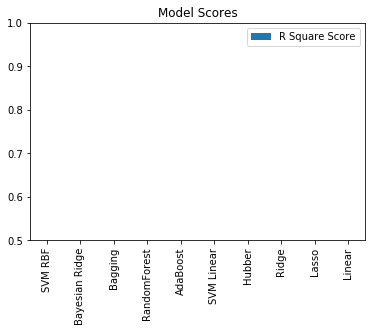

In [ ]:
def lets_try(train,labels):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        #mae = make_scorer(mean_absolute_error)
        r2_val_score = cross_val_score(clf, X_train, y_train, cv=cv,scoring=r2)
        #maes=cross_val_score(clf, X_train, y_train, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AdaBoostRegressor()
    results["AdaBoost"]=test_model(clf)
    
    clf = svm.SVR()
    results["SVM RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVM Linear"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    results=results.sort_values(by=["R Square Score"],ascending=False)
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    return results

lets_try(X_train,y_train)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(dataPCA, y, test_size=.3,random_state=0)

,R Square Score
SVM RBF,-0.460484
Bayesian Ridge,-0.718589
RandomForest,-0.869648
AdaBoost,-1.251346
Bagging,-1.280800
SVM Linear,-1.405343
Hubber,-2.466439
Ridge,-3.438332
Lasso,-11.160568
Linear,-22.357088


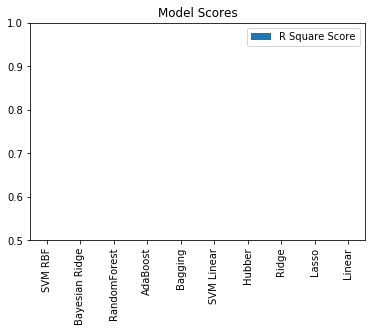

In [ ]:
lets_try(X_train1,y_train1)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} .'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 21.2533 .
Accuracy = -12.70%.
Model Performance
Average Error: 21.3578 .
Accuracy = -16.88%.
Improvement of 32.89%.


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train1, y_train1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(X_test1)
    errors = abs(predictions - y_test1)
    mape = 100 * np.mean(errors / y_test1)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} .'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train1, y_train1)
base_accuracy = evaluate(base_model, X_test1, y_test1)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test1, y_test1)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 22.4733 .
Accuracy = -10.38%.
Model Performance
Average Error: 20.6386 .
Accuracy = -20.02%.
Improvement of 92.90%.
